In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Kernel

In OpenCV, a kernel refers to a small matrix used for image processing operations such as filtering and convolution. A kernel is a set of coefficients that are used to modify the values of pixels in an image.

The kernel is usually defined as a small matrix (e.g., 3x3, 5x5, 7x7) with values representing the weights to be assigned to each pixel in the image. For example, a simple 3x3 kernel for image blurring might have the values:

* [1/9, 1/9, 1/9]
* [1/9, 1/9, 1/9]
* [1/9, 1/9, 1/9]


This kernel assigns equal weight to each pixel and its eight neighbors, and then replaces the value of each pixel with the weighted average of all nine values.

To apply a kernel to an image, the kernel is first positioned over a pixel in the image, and then the values in the kernel are multiplied by the corresponding pixel values in the image. The resulting products are summed, and the result is assigned to the pixel being processed. This process is repeated for every pixel in the image.

OpenCV provides various functions for creating and manipulating kernels, such as the getStructuringElement() function for creating structuring elements for morphological operations, and the filter2D() function for filtering an image using a kernel.




# Define a Function

In [2]:
def catImageShow(imageTitle, image):                             
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

# conv function in kernel

The "conv" function in kernel typically refers to convolution, which is a mathematical operation that is commonly used in image processing, signal processing, and other fields. In the context of kernels, convolution is often used to apply a filter to an image or signal.

In a convolution operation, a kernel (or filter) is applied to a sliding window of data, and the resulting values are summed to produce a single output value. The kernel is typically a small matrix of values that represent the weights of the filter, and it is multiplied element-wise with the data in the sliding window.

The "conv" function in a kernel may refer to a specific implementation of the convolution operation, such as the convolve function in the NumPy library in Python. This function takes an input array and a kernel, and returns the result of applying the kernel to the input array using convolution.

The conv function may also refer to a specific type of convolution operation, such as 1D convolution, 2D convolution, or even higher-dimensional convolution operations. The specific implementation and use of the conv function will depend on the context in which it is being used.





# CopyMakeBorder in kernel


copyMakeBorder is a function in OpenCV library used to create a border around an image. It is typically used to extend the size of an image for further processing. The copyMakeBorder function takes the following arguments:

* **src:** The source image 
* **dst:** The destination image 
* **top:** The number of pixels to be added at the top of the source image 
* **bottom:** The number of pixels to be added at the bottom of the source image 
* **left:** The number of pixels to be added at the left of the source image
* **right:** The number of pixels to be added at the right of the source image 
* **borderType:** The type of border to be added, which can be one of the following: cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP 
* **value:** The color of the border to be added. This argument is used only if the border type is cv2.BORDER_CONSTANT.

When copyMakeBorder is called with these arguments, it creates a new image with the desired border and copies the contents of the source image into the new image. The resulting image can then be used for further processing.

In terms of implementation, copyMakeBorder function usually takes a kernel, a matrix that is used to process an image, as one of its arguments. The kernel specifies how to modify each pixel in the image. The size and shape of the kernel depends on the specific image processing task that is being performed.

For example, if we want to apply a Gaussian blur to an image, we can create a Gaussian kernel matrix and pass it to the copyMakeBorder function. The copyMakeBorder function will then apply the Gaussian kernel to the image, resulting in a blurred image.

In [3]:
def conv(image, kernel):
    imageH, imageW = image.shape[:2]
    kernelH, kernelW = kernel.shape[:2]
    
    padding = (kernelW-1) // 2
    
    image = cv2.copyMakeBorder(image,
                               padding, padding,
                               padding, padding,
                               cv2.BORDER_REFLECT)
    
    outputmask = np.zeros((imageH, imageW), dtype= "float32")
    
    for y in np.arange(padding, imageH+padding):
        for x in np.arange(padding, imageW+padding):
            #ROI --> Region Of Interest
            roi = image[y - padding:y+padding+1,
                        x - padding: x+padding+1]
            k = (roi*kernel).sum()
            outputmask[y-padding, x-padding] = k
    
    outputmask = rescale_intensity(outputmask, in_range = (0, 255))
        
    outputmask = (outputmask*255).astype("uint8")
    
    return outputmask 
    
    

In [4]:
imageArgs = {"image":"../input/catimage/Cat.jpg"}

In [5]:
imageSmallBlur = np.ones((7, 7), dtype="float")*(1.0/(7*7))

imageLargeBlur = np.ones((21, 21), dtype="float")*(1.0/(21*21))

In [6]:
imageSmallBlur

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

In [7]:
imageLargeBlur

array([[0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.0022675

In [8]:
sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype= 'int')

In [9]:
image = cv2.imread(imageArgs["image"])
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
print("Image information {}".format(image))

Image information [[[19 17  9]
  [36 34 26]
  [33 30 25]
  ...
  [ 6  5  7]
  [ 6  5  7]
  [ 6  5  7]]

 [[19 17  9]
  [35 33 25]
  [32 29 24]
  ...
  [ 6  5  7]
  [ 6  5  7]
  [ 6  5  7]]

 [[19 17  9]
  [35 33 25]
  [32 29 24]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]]

 ...

 [[ 7  7  7]
  [ 6  6  6]
  [ 5  5  5]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 7  7  7]
  [ 6  6  6]
  [ 5  5  5]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 7  7  7]
  [ 6  6  6]
  [ 5  5  5]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [11]:
print("Image information {}".format(image.shape))

Image information (183, 276, 3)


In [12]:
print("Image information {}".format(grayimage))

Image information [[15 32 29 ...  6  6  6]
 [15 31 28 ...  6  6  6]
 [15 31 28 ...  6  6  6]
 ...
 [ 7  6  5 ...  0  0  0]
 [ 7  6  5 ...  0  0  0]
 [ 7  6  5 ...  0  0  0]]


In [13]:
print("Image information {}".format(grayimage.shape))

Image information (183, 276)


In [14]:
 convImage = conv(image, sharpen)
 

In [15]:
filtersOnImage = cv2.filter2D(grayimage, -1,sharpen )

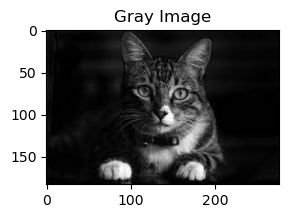

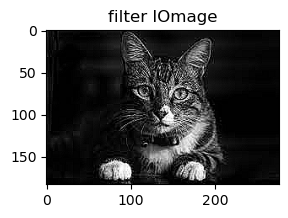

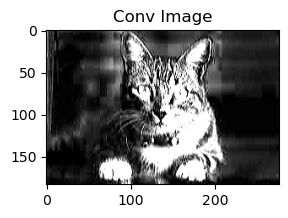

In [16]:
catImageShow("Gray Image", grayimage)
catImageShow("filter IOmage", filtersOnImage)
catImageShow("Conv Image", convImage)

In [17]:
emboss = np.array([[-2, 1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]], dtype = "int")

In [18]:
embossImage = conv(image, emboss)
filtersOnImage = cv2.filter2D(grayimage, -1, emboss)

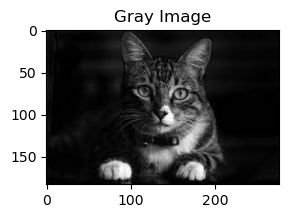

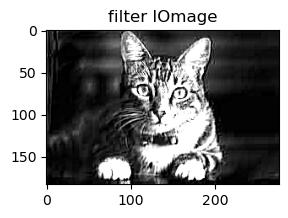

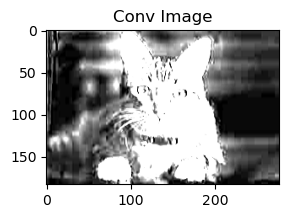

In [19]:
catImageShow("Gray Image", grayimage)
catImageShow("filter IOmage", filtersOnImage)
catImageShow("Conv Image", embossImage)

# putText function 


The putText function in OpenCV is used to draw text on an image. It has the following syntax:

*cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])*


**where:**

* **img:** The image on which to draw the text.
* **text:** The text string to be drawn.
* **org:** The coordinates of the bottom-left corner of the text string in the image. It is a tuple of two values, (x, y).
* **fontFace:** The font type of the text.
* **fontScale:** The scale factor that multiplies the font size. It is a float value.
* **color:** The color of the text. It is a tuple of three values, (B, G, R).
* **thickness:** The thickness of the lines used to draw the text. It is an integer value, and the default value is 1.
* **lineType:** The type of the line used to draw the text. It can be one of the following: cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA.
* **bottomLeftOrigin:** The flag that indicates whether the coordinate origin of the text string is at the bottom-left corner (True) or top-left corner (False). The default value is False.

The putText function returns the modified image with the text string drawn on it.

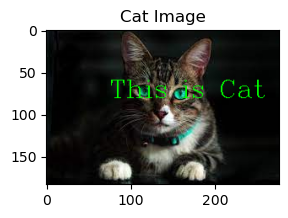

Text(0.5, 1.0, 'Image of Cat')

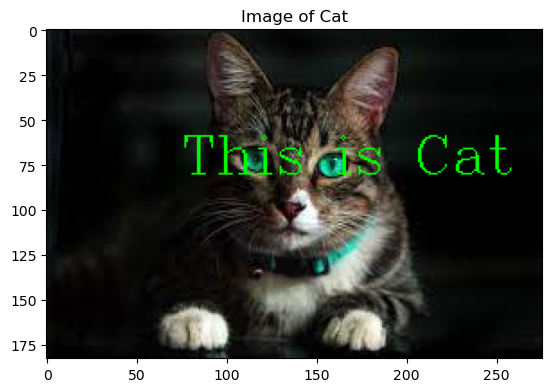

In [20]:
imageText = image.copy()
textonimage = 'This is Cat'
imageCoor = (75, 80)

cv2.putText(imageText,textonimage,imageCoor, fontFace = cv2.FONT_HERSHEY_COMPLEX ,
           fontScale = 1.0,
           color = (0, 255,0))
catImageShow("Cat Image", imageText)

# cv2.waitkey(0)
# cv2.dastroyWindow('Cat Image')

image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)                                         #cv2.subplot(rows, cols, index)
plt.imshow(image)
plt.title('Image of Cat')

Text(0.5, 1.0, 'Image of Cat')

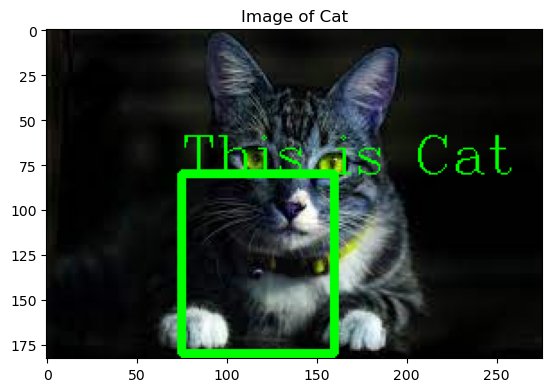

In [21]:
imageText = image.copy()

imageCoor1 = (75, 80)
imageCoor2 = (160, 180)

cv2.rectangle(imageText,imageCoor1,imageCoor2, thickness= 3,color = (0, 255,0))




image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title('Image of Cat')

# Morpological Analysis

# Morphological Analysis 


Morphological analysis is a type of image processing operation used to extract useful information from images by analyzing the shape and structure of objects in the image. It involves operations such as dilation, erosion, opening, and closing.

In OpenCV, morphological analysis is performed using the functions in the "morphology" module. Here are some of the commonly used functions:

* **cv2.erode(src, kernel, iterations):** This function performs erosion on an input image src using the specified kernel (structuring element) and iterations. Erosion is a morphological operation that removes pixels from the edges of objects in an image, making them smaller.

* **cv2.dilate(src, kernel, iterations):** This function performs dilation on an input image src using the specified kernel (structuring element) and iterations. Dilation is a morphological operation that adds pixels to the edges of objects in an image, making them larger.

* **cv2.morphologyEx(src, op, kernel):** This function performs a morphological operation on an input image src using the specified op (operation) and kernel (structuring element). The op parameter can be one of the following: cv2.MORPH_OPEN, cv2.MORPH_CLOSE, cv2.MORPH_GRADIENT, cv2.MORPH_TOPHAT, or cv2.MORPH_BLACKHAT.

* **cv2.getStructuringElement(shape, ksize[, anchor]):** This function creates a structuring element (kernel) of the specified shape and ksize. The shape parameter can be one of the following: cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, or cv2.MORPH_CROSS.


Morphological analysis is often used in applications such as image segmentation, noise removal, and feature extraction.

# Erode Function

Erode is a morphological operation in image processing that can be used to reduce the size of objects in an image by removing pixels from the object boundaries. In OpenCV, you can perform erosion using the erode() function.

Here's an example of how to perform erosion on a binary image using OpenCV:

* import cv2
* import numpy as np

# Read image
img = cv2.imread('binary_image.png', 0)

# Define kernel
kernel = np.ones((5,5), np.uint8)

# Erode image
eroded = cv2.erode(img, kernel, iterations=1)

# Display results
* cv2.imshow('Original Image', img)
* cv2.imshow('Eroded Image', eroded)
* cv2.waitKey(0)
* cv2.destroyAllWindows()
 

In this example, we first read in a binary image using the imread() function with the 0 flag to read the image in grayscale. We then define a 5x5 kernel with all values set to 1 using the np.ones() function. The erode() function is then called with the input image, kernel, and the number of iterations (in this case, 1).

Finally, we display the original image and the eroded image using the imshow() function and wait for a key press before closing the windows using the waitKey() and destroyAllWindows() functions, respectively.

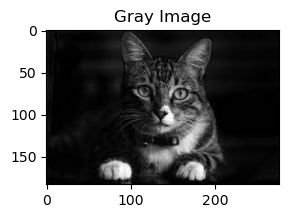

In [22]:
image = cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
catImageShow("Gray Image", imageGray)

for i in range(0, ):
    imageEroded = cv2.erode(imageGray, None, iterations = i+1)
    catImageShow("Image Eroded number is {}".format(i+1),imageEroded)

# Dilate function

The dilate function is a basic operation in morphological image processing that is used to expand the boundaries of objects in an image. It is often used in conjunction with other morphological operations, such as erosion, opening, and closing.

The dilate function works by applying a structuring element, which is a small binary image that defines the shape and size of the neighborhood around each pixel in the input image. The structuring element is placed on each pixel in the input image, and if any of the pixels in the neighborhood defined by the structuring element are "on" (i.e., have a value of 1), the output pixel is set to "on" as well.

In effect, the dilate function makes the objects in the input image larger and smoother, while preserving their general shape and orientation. It is useful for tasks such as filling in small gaps or holes in objects, smoothing out rough edges, and separating overlapping objects.

The size and shape of the structuring element used in the dilate function can have a significant impact on the output of the operation. Larger structuring elements will produce more dilation, while smaller ones will produce less. The choice of structuring element will depend on the specific task and characteristics of the input image.

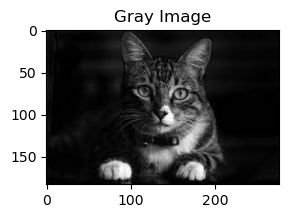

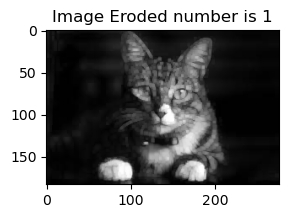

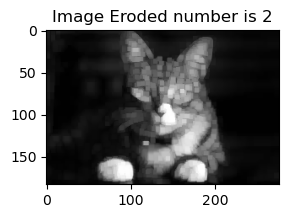

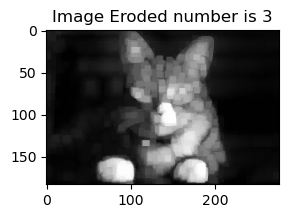

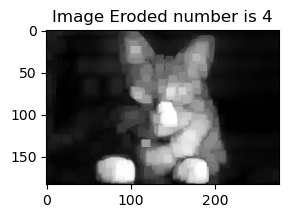

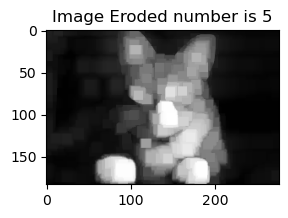

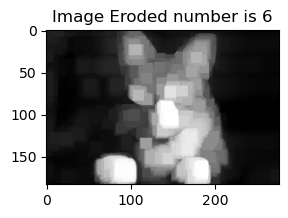

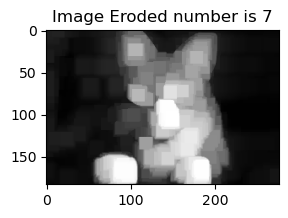

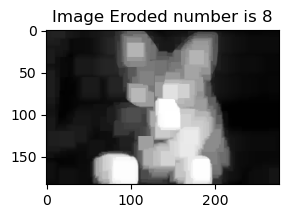

In [23]:
image = cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
catImageShow("Gray Image", imageGray)

for i in range(0, 8):
    imageDilated = cv2.dilate(imageGray, None, iterations = i+1)
    catImageShow("Image Eroded number is {}".format(i+1),imageDilated )

# GetStructuringElement 

In image processing and computer vision, morphological operations are used to process and analyze the shape and structure of images. These operations are based on mathematical morphology, which is a branch of set theory that deals with the analysis and processing of geometrical structures.

One important tool in morphological analysis is the structuring element. A structuring element is a small binary image that defines the shape and size of the neighborhood around each pixel in the input image. Morphological operations use the structuring element to perform operations such as erosion, dilation, opening, and closing on the input image.

In OpenCV, the getStructuringElement function is used to create structuring elements of different shapes and sizes. The function takes two arguments: the shape of the structuring element (e.g., rectangular, circular, or elliptical) and the size of the structuring element (specified as a tuple or a single integer).

Here's an example of how to create a rectangular structuring element of size 3x3 in Python using OpenCV:



# Create a 3x3 rectangular structuring element
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


The resulting structuring element (se) is a numpy array of size (3, 3) with all elements set to 1. This structuring element can be used in morphological operations such as erosion and dilation to process the input image.

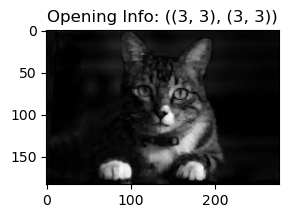

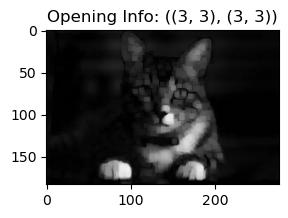

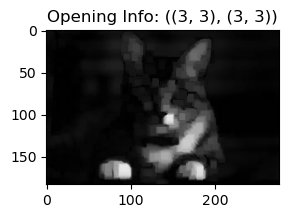

In [24]:
image = cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize  = [(3, 3),
               (5, 5),
               (7, 7)]

# catImageShow("Gray Image", imageGray)

for i in kernelSize:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_OPEN, k)
    
    catImageShow("Opening Info: ({}, {})".format(kernelSize[0],kernelSize[0]), mo)
    
#     imageDilated = cv2.dilate(imageGray, None, iterations = i+1)
#     catImageShow("Image Eroded number is {}".format(i+1),imageDilated )

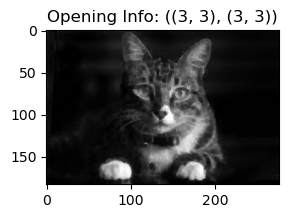

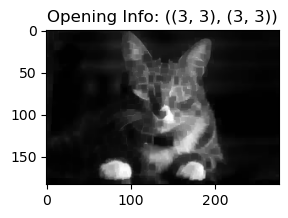

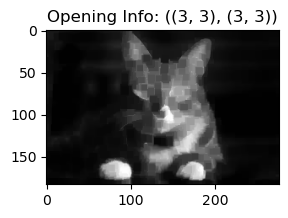

In [25]:
image = cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize  = [(3, 3),
               (5, 5),
               (7, 7)]

# catImageShow("Gray Image", imageGray)

for i in kernelSize:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_CLOSE, k)
    
    catImageShow("Opening Info: ({}, {})".format(kernelSize[0],kernelSize[0]), mo)
    
#     imageDilated = cv2.dilate(imageGray, None, iterations = i+1)
#     catImageShow("Image Eroded number is {}".format(i+1),imageDilated )

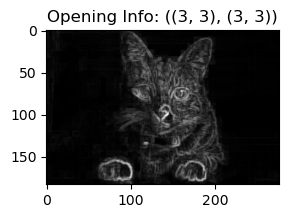

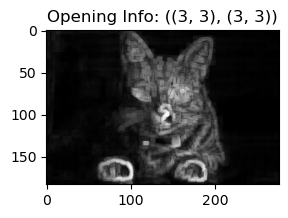

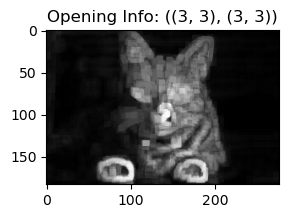

In [26]:
image = cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize  = [(3, 3),
               (5, 5),
               (7, 7)]

# catImageShow("Gray Image", imageGray)

for i in kernelSize:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_GRADIENT, k)
    
    catImageShow("Opening Info: ({}, {})".format(kernelSize[0],kernelSize[0]), mo)
    
#     imageDilated = cv2.dilate(imageGray, None, iterations = i+1)
#     catImageShow("Image Eroded number is {}".format(i+1),imageDilated )

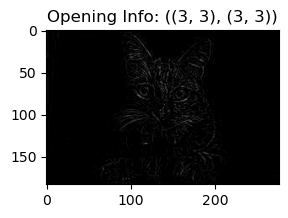

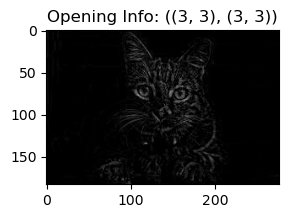

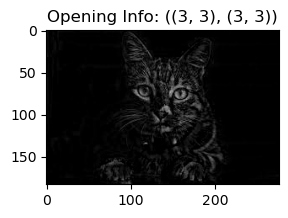

In [27]:
image = cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize  = [(3, 3),
               (5, 5),
               (7, 7)]

# catImageShow("Gray Image", imageGray)

for i in kernelSize:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_TOPHAT, k)
    
    catImageShow("Opening Info: ({}, {})".format(kernelSize[0],kernelSize[0]), mo)
    
#     imageDilated = cv2.dilate(imageGray, None, iterations = i+1)
#     catImageShow("Image Eroded number is {}".format(i+1),imageDilated )

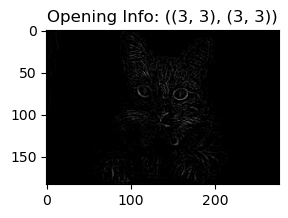

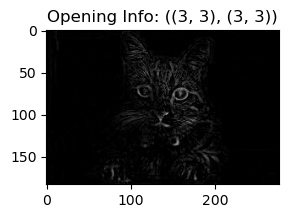

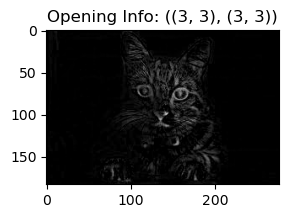

In [28]:
image = cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize  = [(3, 3),
               (5, 5),
               (7, 7)]

# catImageShow("Gray Image", imageGray)

for i in kernelSize:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_BLACKHAT, k)
    
    catImageShow("Opening Info: ({}, {})".format(kernelSize[0],kernelSize[0]), mo)
    
#     imageDilated = cv2.dilate(imageGray, None, iterations = i+1)
#     catImageShow("Image Eroded number is {}".format(i+1),imageDilated )